In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt('SHG_ppln_pritel_1560_500MHz.asc')

In [4]:
data

array([[751.94489, 229.     ],
       [752.00079, 228.     ],
       [752.05676, 227.     ],
       ...,
       [806.71271, 226.     ],
       [806.76385, 228.     ],
       [806.815  , 228.     ]])

(777.0, 780.0)

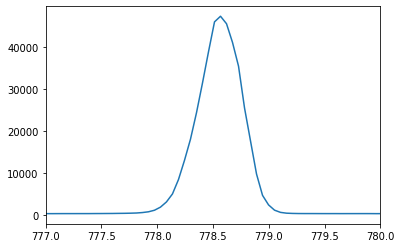

In [8]:
plt.plot([d[0] for d in data],[d[1] for d in data])
plt.xlim([777,780])

In [9]:
from scipy.stats import norm

In [11]:
norm.fit(data)

(710.4108085986327, 2594.5771796848)

In [43]:
from scipy import optimize

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-0.5*((x - mean) / stddev)**2)

popt, _ = optimize.curve_fit(gaussian, [d[0] for d in data], [d[1] for d in data],p0=[50000,778.5,0.32])

In [44]:
popt

array([4.73422876e+04, 7.78568294e+02, 1.91130137e-01])

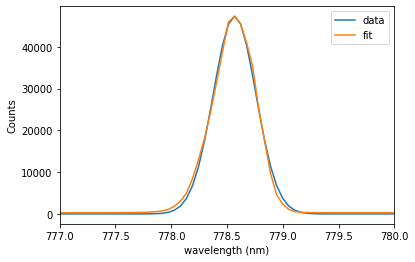

In [49]:
plt.plot([d[0] for d in data], [gaussian(d[0],*popt) for d in data],label='data')
plt.plot([d[0] for d in data],[d[1] for d in data],label='fit')
plt.xlim([777,780])
plt.xlabel("wavelength (nm)")
plt.ylabel("Counts")
plt.legend()
plt.savefig("20230130_pritel_shg_spectrum.pdf")

In [46]:
2.355*popt[2]

0.4501114720006168

In [41]:
0.75/2.355

0.3184713375796178